# Rainfall Anomaly Index

Based on van Rooy, M.P. (1965). A Rainfall Anomaly Index Independent of Time and Space. Notos.

## Packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from spei.rai import mrai, rai

## Data

In [2]:
df = pd.read_csv("data/DEBILT.csv", index_col=0, parse_dates=True)
prec = df["Prec [m/d] 260_DEBILT"].multiply(1e3).resample("MS").sum()

## Calculate Index

In [3]:
ra_index = rai(prec)
mra_index = mrai(prec, sf=1.7)

## Visualize

(np.float64(14610.0), np.float64(18627.0))

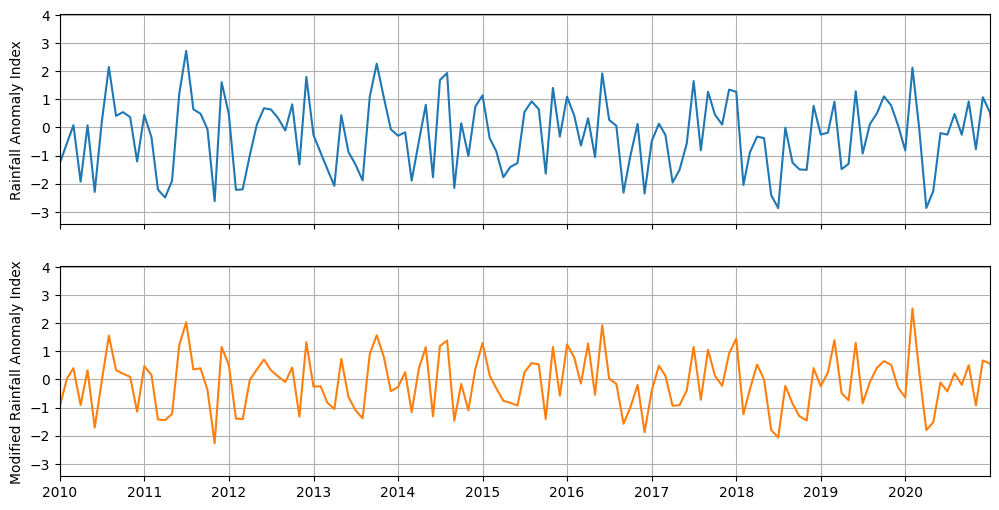

In [4]:
f, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
ax[0].plot(ra_index.index, ra_index.values, color="C0")
ax[1].plot(mra_index.index, mra_index.values, color="C1")
ax[0].set_ylabel("Rainfall Anomaly Index")
ax[1].set_ylabel("Modified Rainfall Anomaly Index")
ax[0].grid(True)
ax[1].grid(True)
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax[1].xaxis.set_major_locator(mpl.dates.YearLocator(1))
ax[1].set_xlim(pd.Timestamp("2010-01-01"), pd.Timestamp("2020-12-31"))

Interpretation based on Hansel (2015) - [The Modified Rainfall Anomaly Index (mRAI)](https://doi.org/10.1007/s00704-015-1389-y)

| RAI                                 | Description                   | mRAI                  | Description                   |
| :---------------------------------- | :---------------------------- | :-------------------------------- | :---------------------------- |
| $\ge$ 3.00                           | Extremely wet                 | $\ge$ 2.00                     | Extremely wet                 |
| 2.00 to 2.99                        | Very wet                      | 1.50 to 1.99                  | Very wet                      |
| 1.00 to 1.99                        | Moderately wet                | 1.00 to 1.49                  | Moderately wet                |
| 0.50 to 0.99                        | Slightly wet                  | 0.50 to 0.99                  | Slightly wet                  |
| -0.49 to 0.49                       | Near normal                   | -0.49 to 0.49                 | Near normal                   |
| -0.99 to -0.50                       | Slightly dry                  | -0.99 to -0.50                 | Slightly dry                  |
| -1.99 to -1.00                       | Moderately dry                | -1.49 to -1.00                 | Moderately dry                |
| -2.99 to -2.00                       | Very dry                      | -1.99 to -1.50                 | Very dry                      |
| ≤-3.00                           | Extremely dry                 | ≤-2.00                     | Extremely dry                 |